<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 37px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  MACHINE LEARNING PROJECT <br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  -<br>
  </div> 
  
<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
     new york rolling sales<br><br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 25px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      <font color=orange> MOUAD RHAZI </font>
  </div>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      
  </div>

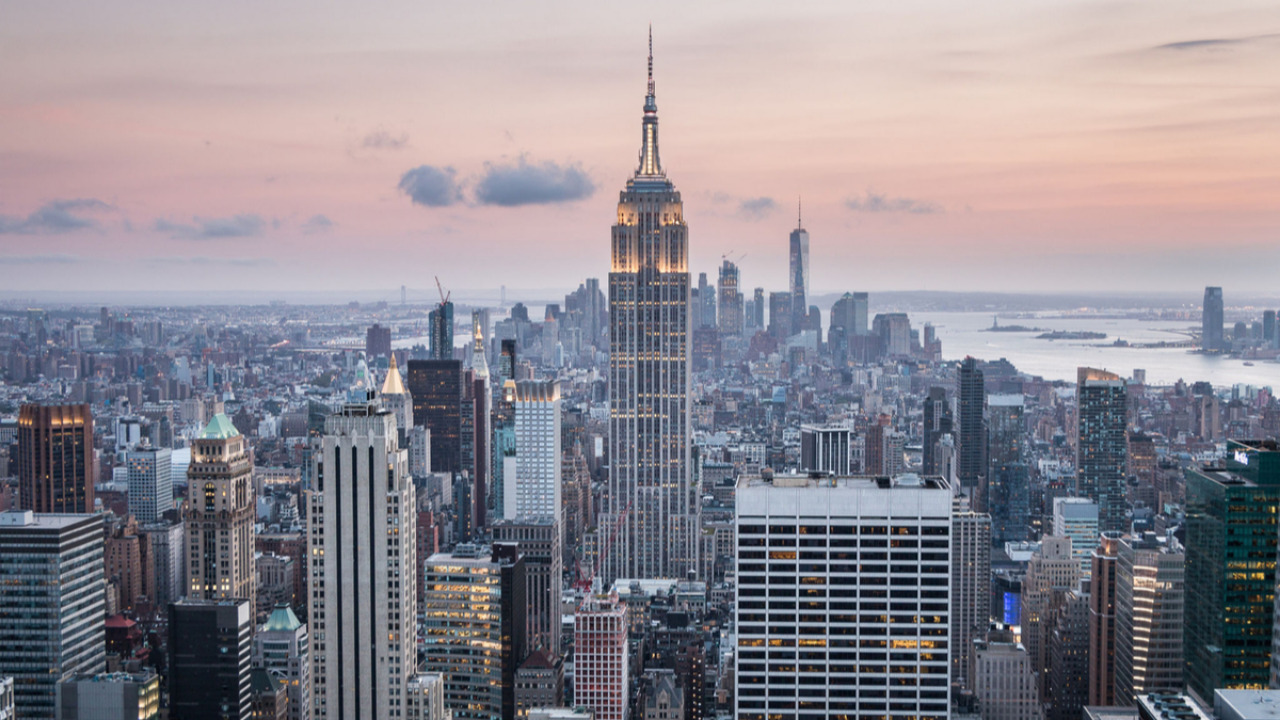

# About this notebook : 


#### Context

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

#### Content ####

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE : The type of building at various points in time. See the glossary linked to below.

For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

#### Acknowledgements ####

This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset.



# Data Preprocessing : 

### Imports ###

The first import we are going to undergo is the autoreload which is a IPython extension to reload modules before executing user code. Autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt. In our case we load 2 autoreloads, first the autoreload wich reloads all modules (except those excluded by %aimport) automatically now, and the autoreload 2 which reloads all modules (except those excluded by %aimport) every time before executing the Python code typed.


In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline 



Then we import all the librairies which are going to be needed for the project processing : 

In [2]:
import os 
import copy 
import sys 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path_to_repo = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
sys.path.insert(0, os.path.join(path_to_repo, 'src'))
from emlyon.utils import *

### Preprocessing : 

Here we are setting the path where our data set exists : 

In [3]:
path_to_project = os.path.join(path_to_repo,"project")
path_to_project

'/Users/mouadrhazi/Downloads/EMLyon/project'

In [4]:
path_to_dataset2 = os.path.join(path_to_project,'nyc-rolling-sales.csv')
path_to_dataset2

'/Users/mouadrhazi/Downloads/EMLyon/project/nyc-rolling-sales.csv'

Now that we managed to locate oursleves in the same folder as the folder containing the dataset 'nyc-rolling-sales', we can resume with reading the csv.  Note that we set the parameter parse_dates which default value is None to 'sale date', since we will to do some analysis and get the most out of the sales dates. 

In [5]:
# Reading the csv file : 

df = pd.io.parsers.read_csv(path_to_dataset2,low_memory = False, parse_dates = ["SALE DATE"])

In [6]:
# Let's look at the data first ! 

df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21


We can straight away notice that there are some columns that we can already drop, assuming they won't impact anywhere our analysis. First let's check the columns exact string names in order to be able to execute the drop using pandas. But before lets know the length of colmns ( number ) before and after the execution of the drop to make sure it went smooth. For the sake of the analysis let's make a change that could make our life easier and lowercase all the column names replacing the space with a bracket '_' : 

In [7]:
# Let's create a copy of the df in which we apply the changement, so that we always have a back up 

df_copy = df.copy( deep=True )

In [8]:
# Checking the columns exact names : 

df_copy.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [9]:
# Doing the manipulation in order to change the columns titles : 

df_copy.columns = df_copy.columns.str.replace(' ', '_')
df_copy.columns = df_copy.columns.str.lower()
df_copy.columns

Index(['unnamed:_0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [10]:
# Checking the length of the features before the drop : 

len(df_copy.columns)

22

In [11]:
# Performing the drop of the features : 

df_copy = df_copy.drop (['unnamed:_0','ease-ment'] ,axis ='columns') 

In [12]:
# Checking the length of the features after the drop in order to make sure the drop has been done:

len(df_copy.columns)

20

### Investigating features : 

In this section we want to invetigate a little bit about the features types. We will find out the two types of variables found will be int64 and object variables. We decide to convert those to types of variables into categoy variables.

Reminder : The categorical data type is useful in the following cases:

- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.
- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.
- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [13]:
# Checking the types of the variables.

df_copy.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                   int64
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                          object
gross_square_feet                         object
year_built                                 int64
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                object
sale_date                         datetime64[ns]
dtype: object

In [14]:
# Let's print the features for each type using forating method : 

print ('The columns with type object are the following :{}'.format(df_copy.select_dtypes(['object']).columns))
print('')
print('')
print ('The columns with type int64 are the following :{}'.format(df_copy.select_dtypes(['int64']).columns))

The columns with type object are the following :Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'building_class_at_present', 'address', 'apartment_number',
       'land_square_feet', 'gross_square_feet',
       'building_class_at_time_of_sale', 'sale_price'],
      dtype='object')


The columns with type int64 are the following :Index(['borough', 'block', 'lot', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'year_built',
       'tax_class_at_time_of_sale'],
      dtype='object')


Here we will create two list one for each variables type, and then convert both types ( of the features inside the list ) into variables of type category.

NB :  not all variables are being converted, only those whose conversion seems useful for the purpose of the data preprocessing.

In [15]:
obj_list = ['neighborhood', 'building_class_category', 'tax_class_at_present',
       'building_class_at_present', 'address', 'apartment_number',
        'building_class_at_time_of_sale'] # This a list of variables with type object 

int_list = ['borough', 'block', 'lot', 'zip_code',
       'tax_class_at_time_of_sale'] # And this is a list of variables with type int64

# Creating two loops to over the features in both lists and covnert their type into category type 

for column in obj_list : 
    df_copy[column] = df_copy[column].astype('category') 

for column in int_list : 
    df_copy[column] = df_copy[column].astype('category')

In [16]:
# checking the types to make sure the conversion has been successful : 

df_copy.dtypes

borough                                 category
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                          object
gross_square_feet                         object
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                                object
sale_date                         datetime64[ns]
dtype: object

In [17]:
# We then convert the two main features + the output into numerical variables : 

df_copy['land_square_feet'] = pd.to_numeric(df_copy['land_square_feet'], errors='coerce')
df_copy['gross_square_feet']= pd.to_numeric(df_copy['gross_square_feet'], errors='coerce')
df_copy['sale_price'] = pd.to_numeric(df_copy['sale_price'], errors='coerce')

### Missing values :

In this section, we will go over the missing values that are contained in our dataset : 

In [18]:
# checking if there are any missing values inside the dataset and getting as an output the concerned columns :

df_copy.columns[df_copy.isnull().any()]

Index(['land_square_feet', 'gross_square_feet', 'sale_price'], dtype='object')

In [19]:
# Calculating the pourcentage of missing values among all the values of the concerned columns 

missing_values = round((df_copy.isnull().sum()/len(df_copy))*100)
missing_va = missing_values[missing_values>0]
missing_va = missing_va.sort_values(ascending = False)
print( 
    'The percentage of missing values in the three columns is : {} % '.format(round(missing_va,2)))

The percentage of missing values in the three columns is : gross_square_feet    33.0
land_square_feet     31.0
sale_price           17.0
dtype: float64 % 


In [20]:
# Put it all in a Dataframe for a better vizualization : 

missing_va=missing_va.to_frame()
missing_va.columns=['% of missing values']
missing_va.index.names=['Column']
missing_va['Column']=missing_va.index
missing_va

,% of missing values,Column
Column,,
gross_square_feet,33.0,gross_square_feet
land_square_feet,31.0,land_square_feet
sale_price,17.0,sale_price


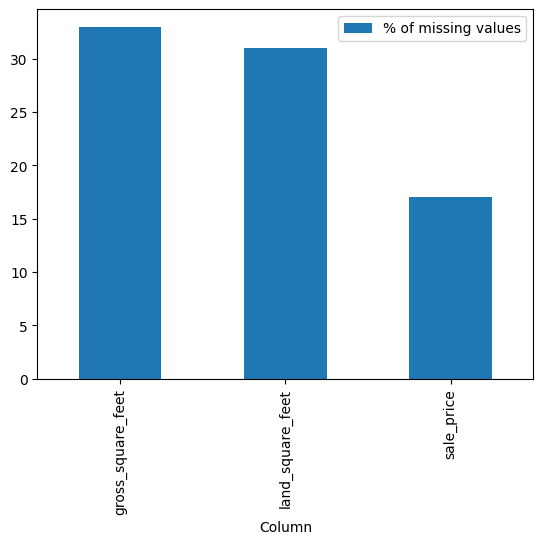

In [21]:
# plotting a barplot for an even better visualization : 

_ = missing_va.plot(kind='bar')

Overall, the dataset is generally in good shape when it comes to missing values. There are however, missing values for the land (31%) and gross square feet (33%) of the housing units. Additionally, sale prices (17%) are missing.

This may be explained by the following for the context and content description for the dataset below:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [22]:
df_copy['gross_square_feet'] = df_copy['gross_square_feet'].fillna(df_copy['gross_square_feet'].median())
df_copy['land_square_feet'] = df_copy['land_square_feet'].fillna(df_copy['land_square_feet'].median())

### Focusing on the ouptut : 

In this section, we will focus on the sales price, we noticed before that it contains some missing values, for the moment we can ignore them, but let's look at it correlation matrice and see how other features behave regarding the sales price. ( how much explained information they share together ) 

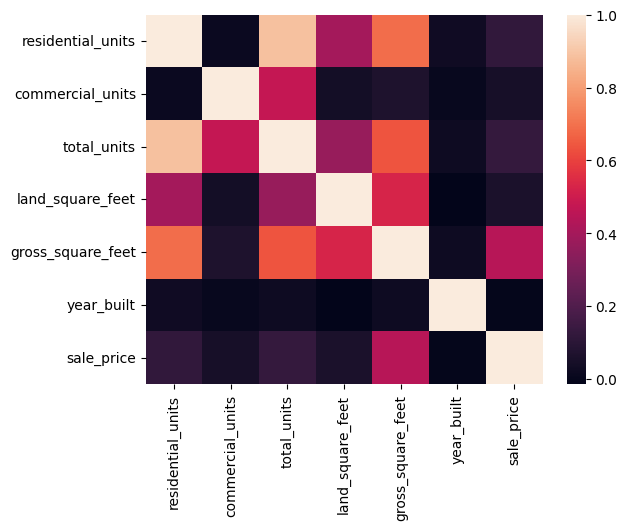

In [23]:
# After installing seaborn in the mlcourse env we import it and call corr to display the correlation hm:

import seaborn as sns 
cor = df_copy.corr() 
_ = sns.heatmap(cor)

In [24]:
cor['sale_price'].sort_values(ascending = False)

sale_price           1.000000
gross_square_feet    0.443498
total_units          0.125101
residential_units    0.119698
land_square_feet     0.058767
commercial_units     0.046006
year_built          -0.003539
Name: sale_price, dtype: float64

In [25]:
# we display a describe dataframe but only for quantitative features to have a better understanding : 

num_only = df_copy.select_dtypes([np.number])
num_only.describe().T

,count,mean,std,min,25%,50%,75%,max
residential_units,84548.0,2.025264e+00,1.672104e+01,0.0,0.0,1.0,2.0,1.844000e+03
commercial_units,84548.0,1.935587e-01,8.713183e+00,0.0,0.0,0.0,0.0,2.261000e+03
total_units,84548.0,2.249184e+00,1.897258e+01,0.0,1.0,1.0,2.0,2.261000e+03
land_square_feet,84548.0,3.439701e+03,3.486985e+04,0.0,2000.0,2325.0,2658.0,4.252327e+06
gross_square_feet,84548.0,3.273106e+03,2.876966e+04,0.0,1348.0,1680.0,2080.0,3.750565e+06
year_built,84548.0,1.789323e+03,5.373450e+02,0.0,1920.0,1940.0,1965.0,2.017000e+03
sale_price,69987.0,1.276456e+06,1.140526e+07,0.0,225000.0,530000.0,950000.0,2.210000e+09


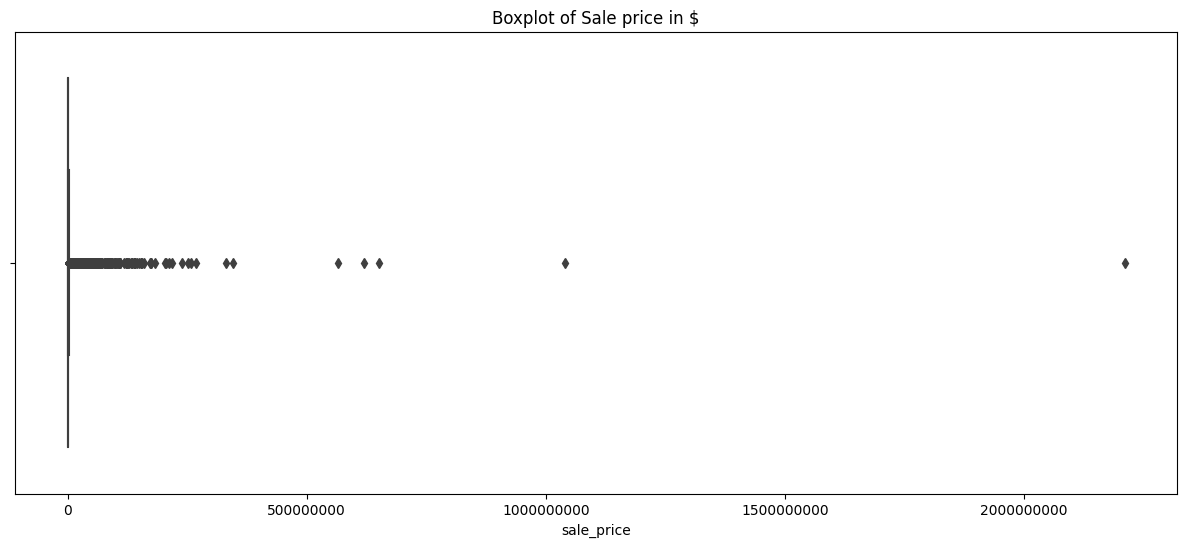

In [26]:
# And here we display a boxplot of the variable sale price so that we can detect outliers and delete them :

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
_= sns.boxplot(x='sale_price', data=df_copy)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale price in $')
plt.show()

We can see that there are some outliers that we are going to instantly delete and drop in the following line

In [27]:
df_copy = df_copy[(df_copy['sale_price'] > 100000) & (df_copy['sale_price'] < 5000000)]

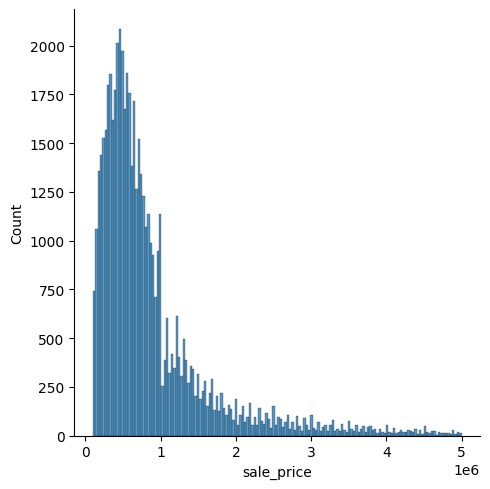

In [28]:
sns.displot(df_copy['sale_price'])

When we check the distribution of the variable, we notice it is not standirized, and this may not be good for the sake of the sudy, so we will use skew and log in order to normalize the distribution

In [29]:
df_copy['sale_price'].skew()

2.3446374221747437

In [30]:
sales = np.log(df_copy['sale_price'])

In [31]:
print(sales.skew())

0.1989281802313763


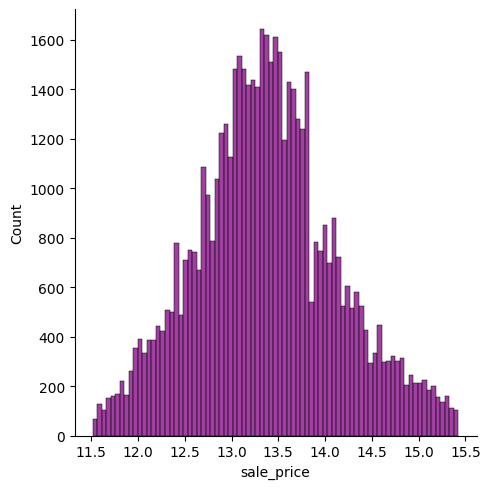

In [32]:
sns.displot(sales, color='purple')

As we can see now the distribution is way better. Next up we focus on the gross square fit and the land square feet

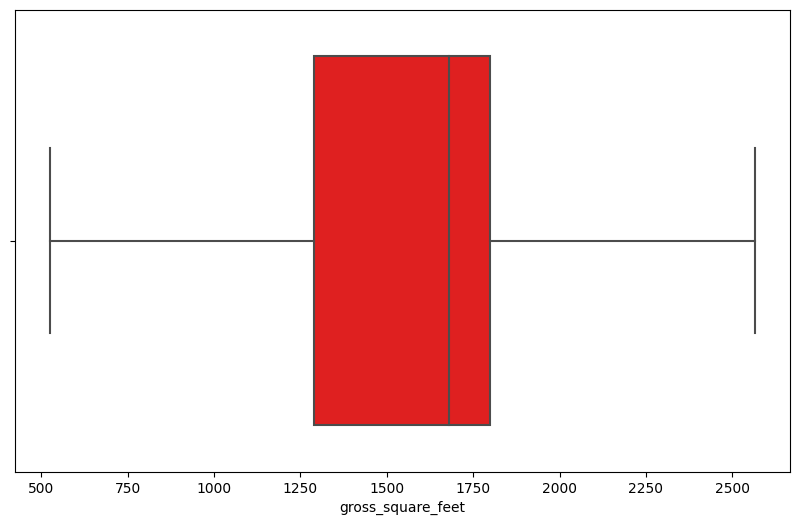

In [33]:
# We plot a boxplot of the var gross_square_feet: 

plt.figure(figsize=(10,6))
_ = sns.boxplot(x='gross_square_feet', data=df_copy,showfliers=False, color='red')

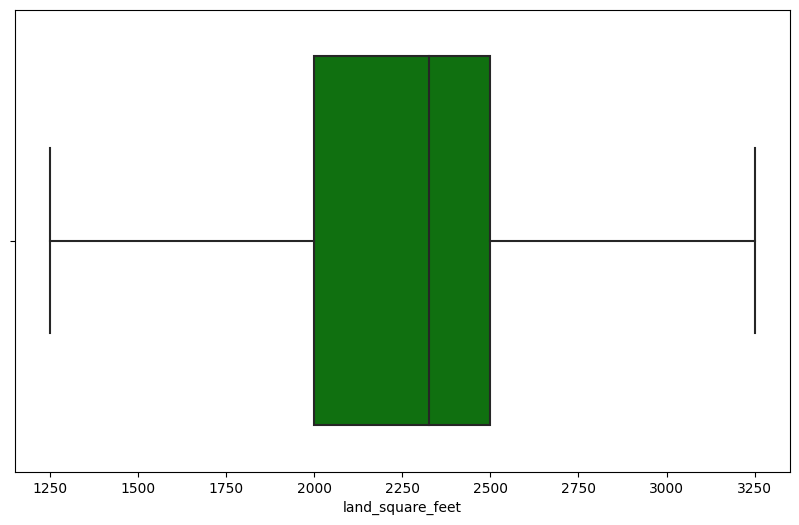

In [34]:
# We plot a boxplot of the var land square feet : 

plt.figure(figsize=(10,6))
_ = sns.boxplot(x='land_square_feet', data=df_copy,showfliers=False, color = 'green')

In [35]:
# we decide to limit de gross square feet and the land square feet to 10000 : 

df_copy = df_copy[df_copy['gross_square_feet'] < 10000]
df_copy = df_copy[df_copy['land_square_feet'] < 10000]

<AxesSubplot: xlabel='gross_square_feet', ylabel='sale_price'>

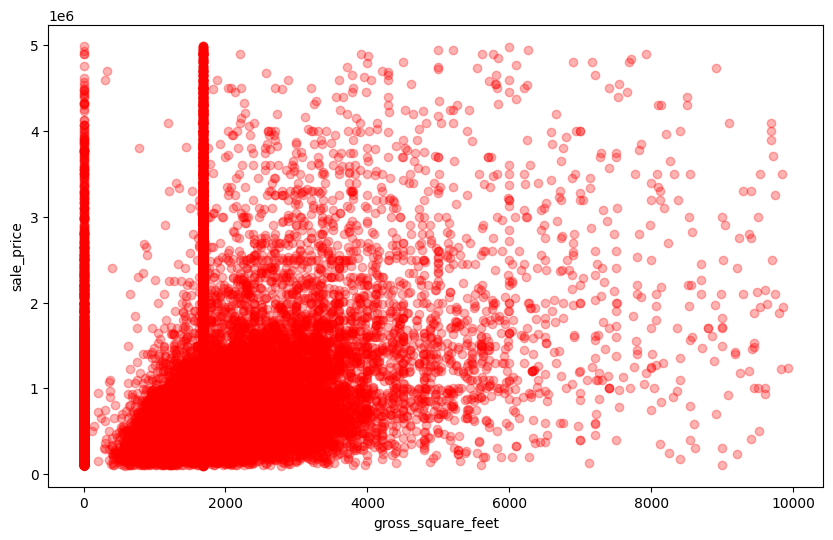

In [36]:
# we plot a plot of kind scatter between the sale price and the gross square feet : 

plt.figure(figsize=(10,6))
sns.regplot(x='gross_square_feet', y='sale_price', data=df_copy, fit_reg=False, scatter_kws={'alpha':0.3}, color='red')

<AxesSubplot: xlabel='land_square_feet', ylabel='sale_price'>

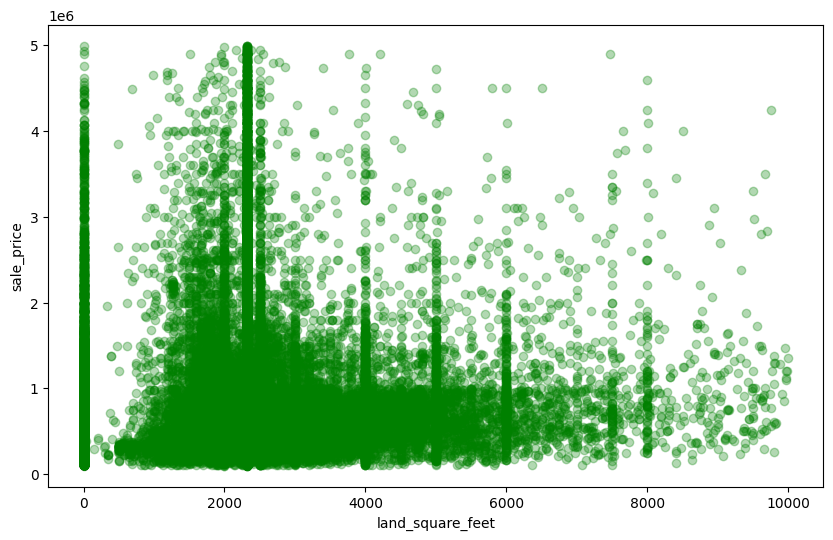

In [37]:
# we plot a plot of kind scatter between the sale price and the land square feet : 

plt.figure(figsize=(10,6))
sns.regplot(x='land_square_feet', y='sale_price', data=df_copy, fit_reg=False, scatter_kws={'alpha':0.3}, color='green')

### Visualizing other features : 

#### Total Units : 

In [38]:
# grouping sale prices by total units : 

df_copy[["total_units", "sale_price"]].groupby(['total_units'], as_index=False).count().sort_values(by='sale_price', ascending=False)

,total_units,sale_price
1,1,24620
0,0,15500
2,2,9492
3,3,2723
4,4,696
6,6,362
5,5,170
8,8,134
7,7,71
9,9,56


We notice that there are 15500 house sold which had 0 total units, we decide to replace it by 1.

In [39]:
df_copy = df_copy.replace({'total_units':0 }, {'total_units':1}, regex=True)

In [40]:
df_copy[["total_units", "sale_price"]].groupby(['total_units'], as_index=False).count().sort_values(by='sale_price', ascending=False)

,total_units,sale_price
0,1,40120
1,2,9492
2,3,2723
3,4,696
5,6,362
4,5,170
7,8,134
6,7,71
8,9,56
9,10,44


In [41]:
# Eliminate the outlier (2262)

df_copy = df_copy[df_copy['total_units'] != 2261]

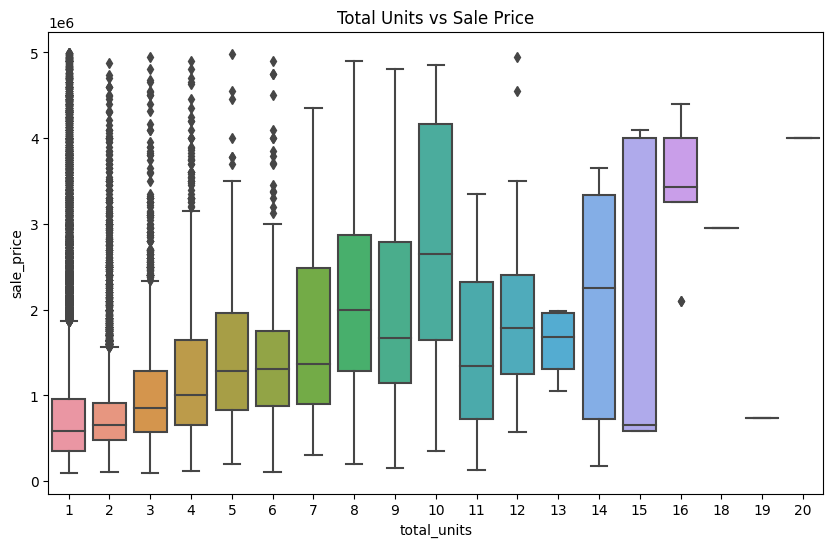

In [42]:
# Ploting the sales price vs total units boxplot : 

plt.figure(figsize=(10,6))
sns.boxplot(x='total_units', y='sale_price', data=df_copy)
plt.title('Total Units vs Sale Price')
plt.show()

#### Commercial Units : 

In [43]:
# Grouping the sale price by the commercial untis: 

df_copy[["commercial_units", "sale_price"]].groupby(['commercial_units'], as_index=False).count().sort_values(by='sale_price', ascending=False)

,commercial_units,sale_price
0,0,52214
1,1,1374
2,2,205
3,3,71
4,4,26
6,6,11
5,5,8
7,7,5
9,9,2
8,8,1


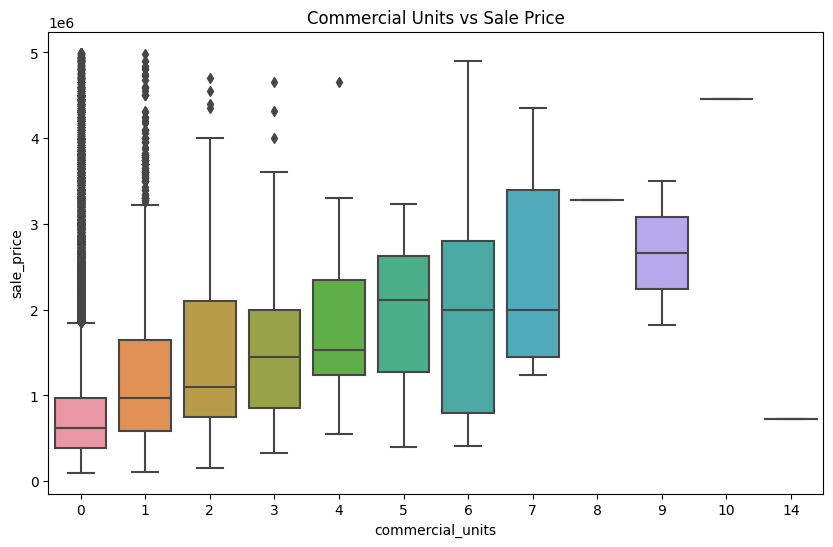

In [44]:
# showing a boxplot of sale price vs commercial units : 

plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y='sale_price', data=df_copy)
plt.title('Commercial Units vs Sale Price')
plt.show()

#### Residential Units : 

In [45]:
# grouping sale price by residential untis : 

df_copy[["residential_units", 
         "sale_price"]].groupby(['residential_units'] , as_index=False).count().sort_values(by='sale_price', ascending=False)

,residential_units,sale_price
1,1,24065
0,0,16500
2,2,9636
3,3,2332
4,4,642
6,6,336
5,5,116
8,8,114
7,7,54
9,9,45


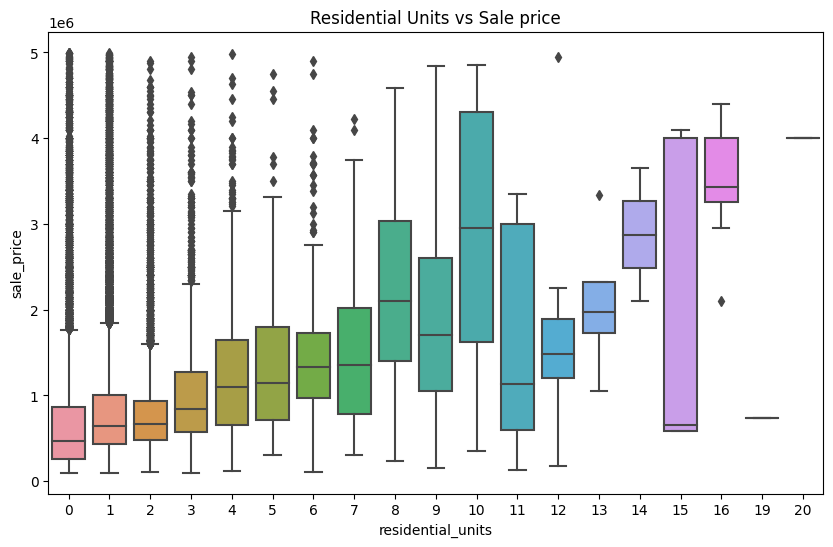

In [46]:
# ploting the result in a boxplot : 

plt.figure(figsize=(10,6))
sns.boxplot(x='residential_units', y= 'sale_price', data = df_copy)
plt.title('Residential Units vs Sale price')
plt.show()

In [47]:
cat_data=df_copy.select_dtypes(exclude=[np.number])
cat_data.describe(datetime_is_numeric = False)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_date
count,53919.0,53919,53919,53919,53919.0,53919.0,53919,53919,53919,53919.0,53919.0,53919,53919
unique,5.0,251,41,10,10267.0,2296.0,115,45317,2642,182.0,3.0,114,327
top,4.0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066.0,1.0,D4,131-05 40TH ROAD,,10314.0,2.0,D4,2017-06-29 00:00:00
freq,17360.0,2102,12244,24051,388.0,3002.0,10768,209,41952,1077.0,26950.0,10769,370
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-31 00:00:00


#### In this section, we will proceed by creating pivot tables between the feature : "Tax class at present","Tax class at time of sale","borough"," Building Class Category" from one side and the sale price from another side. In addation we are going to process a pivot table for each of these features with the dependent variable sale price.

#### Tax class at present : 

In [48]:
# pivot table between tax class at present and sale price : 

pivot=df_copy.pivot_table(index='tax_class_at_present', values='sale_price', aggfunc=np.median)
pivot

,sale_price
tax_class_at_present,
,925000.0
1,592000.0
1A,390000.0
1B,370000.0
1C,958668.0
2,635581.5
2A,1200000.0
2B,1835000.0
2C,850000.0


In [49]:
df_copy['tax_class_at_present'].unique()

['2B', '2', '2C', '2A', '4', '1C', ' ', '1', '1A', '1B']
Categories (11, object): [' ', '1', '1A', '1B', ..., '2B', '2C', '3', '4']

In [50]:
df_copy['tax_class_at_present'].mode()

0    1
Name: tax_class_at_present, dtype: category
Categories (11, object): [' ', '1', '1A', '1B', ..., '2B', '2C', '3', '4']

In [51]:
pivott = df_copy.pivot_table(index = 'tax_class_at_present', values = 'sale_price', aggfunc = np.median)
pivott

,sale_price
tax_class_at_present,
,925000.0
1,592000.0
1A,390000.0
1B,370000.0
1C,958668.0
2,635581.5
2A,1200000.0
2B,1835000.0
2C,850000.0


<AxesSubplot: xlabel='tax_class_at_present'>

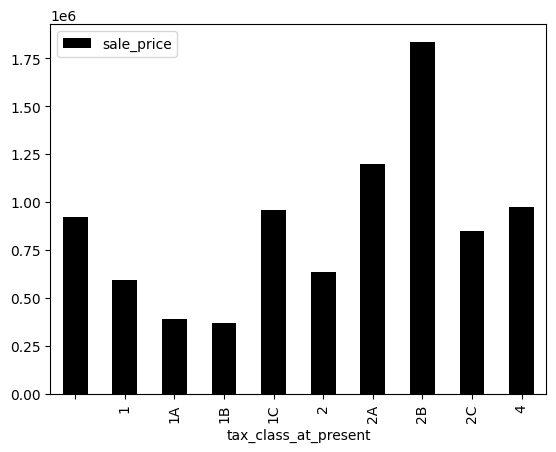

In [52]:
# ploting the pivot as bars : 

pivot.plot(kind='bar', color='black') 

#### Tax Class at time of sale : 

In [53]:
# Pivot table between tax class at time of sale and sale price :

pivote = df_copy.pivot_table(index = 'tax_class_at_time_of_sale', values = 'sale_price', aggfunc=np.median)
pivote

,sale_price
tax_class_at_time_of_sale,
1,580000.0
2,680191.0
4,975000.0


<AxesSubplot: xlabel='tax_class_at_time_of_sale'>

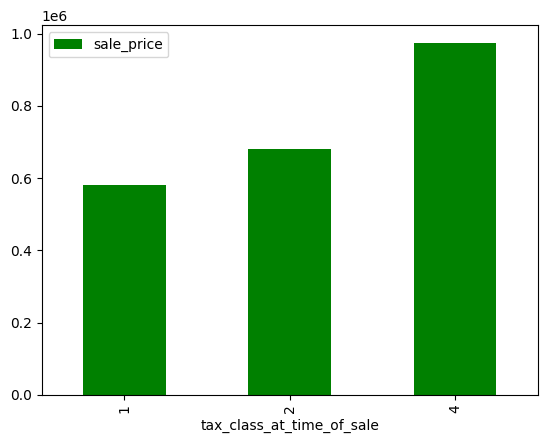

In [54]:
# ploting the pivot as bars : 

pivote.plot(kind='bar',color='green')

#### BOROUGH : 

In [55]:
# pivot table between borough and sale price : 

pivotee = df_copy.pivot_table(index='borough',values='sale_price',aggfunc=np.median)
pivotee

,sale_price
borough,
1,998984.0
2,410000.0
3,775000.0
4,505000.0
5,465713.0


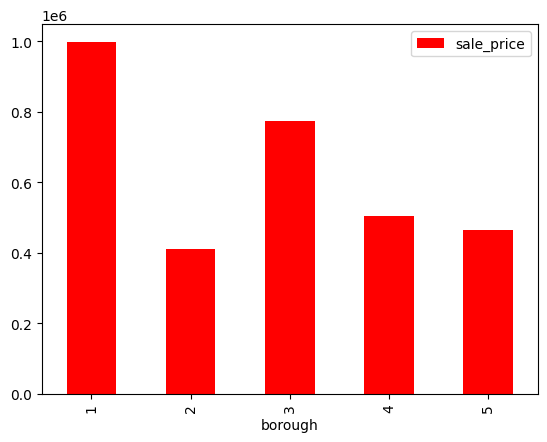

In [56]:
# ploting the pivot as bars : 

_ = pivotee.plot(kind='bar',color='red')

#### Building Class Category : 

In [57]:
# Processing a pivot table between Building Class category and sale price :

pivottee = df_copy.pivot_table(index='building_class_category',values='sale_price',aggfunc=np.median)
pivottee

,sale_price
building_class_category,
01 ONE FAMILY DWELLINGS,510000.0
02 TWO FAMILY DWELLINGS,663000.0
03 THREE FAMILY DWELLINGS,819500.0
04 TAX CLASS 1 CONDOS,425880.0
05 TAX CLASS 1 VACANT LAND,400000.0
06 TAX CLASS 1 - OTHER,464500.0
07 RENTALS - WALKUP APARTMENTS,1275000.0
08 RENTALS - ELEVATOR APARTMENTS,3670000.0
09 COOPS - WALKUP APARTMENTS,300000.0


<AxesSubplot: xlabel='building_class_category'>

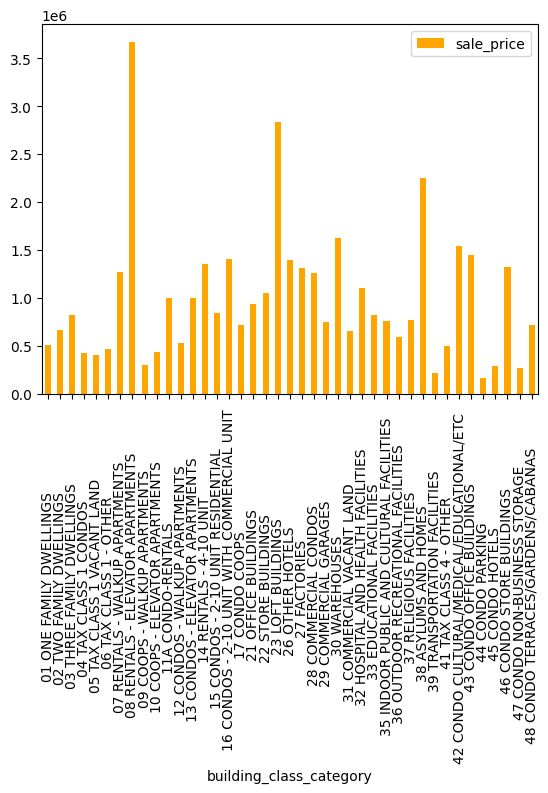

In [58]:
# ploting the pivot as bars : 

pivottee.plot(kind='bar',color='orange')

### Normalising and Transforming Numerical columns :

In [59]:
# Setting the columns that are going to be tranformer : 

numeric_data = df_copy[['block', 'lot', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet','year_built',
       'sale_price']]

In [60]:
#transforming the numeric features using log(x + 1) : 

from scipy.stats import skew
skewed = df_copy[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index

### One hot encoder and final transformations : 

In [61]:
# Creating a copy of df_copy just to make sure we have a backup in case somthing went wrong : 

df_coop = df_copy.copy()

In [62]:
#Selecting the variables to be one-hot encoded : 

one_hot_features = ['borough', 'building_class_category','tax_class_at_present','tax_class_at_time_of_sale']#Select the variables to be one-hot encoded


In [63]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding)

one_hot_encoded = pd.get_dummies(df_coop[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53919 entries, 3 to 84545
Data columns (total 67 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   borough_1                                                             53919 non-null  uint8
 1   borough_2                                                             53919 non-null  uint8
 2   borough_3                                                             53919 non-null  uint8
 3   borough_4                                                             53919 non-null  uint8
 4   borough_5                                                             53919 non-null  uint8
 5   building_class_category_01 ONE FAMILY DWELLINGS                       53919 non-null  uint8
 6   building_class_category_02 TWO FAMILY DWELLINGS                       53919 non-null  uint8
 7   building_clas

In [64]:
# Replacing categorical columns with dummies : 

fdf = df_coop.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [65]:
fdf.shape

(53919, 83)

In [66]:
# Lets apply the function add_datepart, it converts a column of df from a datetime64 to many columns 
# containing the information from the date the information from the date

add_datepart(fdf,'sale_date')

In [67]:
# and now let's apply the function proc_df, takes a data frame df and splits off the response variable, and
# changes the df into an entirely numeric dataframe. For each column of df which is not in skip_flds 
# nor in ignore_flds, na values are replaced by the median value of the column.

df_,y,nas = proc_df(fdf,'sale_price')

# Modeling : 

In this chapter we will try to find the best model that is going to allow us to predict the sale price of New York properties with the most accuracy possible. We chose to do a regression task using Random Forest since it is known to be the most advanced algorithm, and one that's hard to beat. The metrics that are going to be used in order to choose the best model among all those fitted are the rmse and the r score in the validation set. 

### Imports : 

In [68]:
# Importing modules form sklearn : 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
import math
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,train_test_split

# Defining the funciton allowing us the have the rmse for each model : 

def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

# Defining a fucnction to display both rmse and r2 score for the training set and the validation set:

def printscores(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return


### Splitting Data : 

In [69]:
# Let's split the data into a training set and a validation set and use log(y) for the ouput for more precision :  : 

y = np.log(y)
X_train,X_valid,y_train,y_valid = train_test_split(df_,y,train_size=0.7)

### Proposed Models : 

#### Model 1 : 

In [70]:
%time 

model1= RandomForestRegressor()

%time 

model1.fit(X_train ,y_train )

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


RandomForestRegressor()

In [71]:
%time printscores(model1,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.1510
RMSE on valid set: 0.4038
R^2 on train set: 0.9592
R^2 on valid set: 0.7097
CPU times: user 2.29 s, sys: 110 ms, total: 2.4 s
Wall time: 2.46 s


#### Model 2:

In [72]:
model2= RandomForestRegressor(bootstrap = True,
              max_depth = 90,
              max_features= 'sqrt',
              min_samples_leaf = 4,
              min_samples_split=10,
              n_estimators=200
                         )
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [73]:
%time printscores(model2,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.3638
RMSE on valid set: 0.4368
R^2 on train set: 0.7634
R^2 on valid set: 0.6602
CPU times: user 2.45 s, sys: 22.4 ms, total: 2.47 s
Wall time: 2.48 s


#### Model 3 :

In [74]:
model3 = RandomForestRegressor(
    
    n_estimators = 30, 
    criterion = 'squared_error', 
    max_depth = 10, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0,
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    
    bootstrap = True,
    oob_score = False, 
    max_samples = None,

    
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
model3.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=30,
                      n_jobs=-1, random_state=42)

In [75]:
%time 
printscores(model3,X_train,y_train,X_valid,y_valid)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
RMSE on train set: 0.4016
RMSE on valid set: 0.4376
R^2 on train set: 0.7117
R^2 on valid set: 0.6589


#### Model 4 : 

In [76]:
model4 = RandomForestRegressor(
    n_estimators = 40, 
    criterion = 'squared_error', 
    
    
    max_depth = 15,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    ccp_alpha = 0.0, 
 
    
    max_features = 0.5, 
    bootstrap = True,
    oob_score = True, 
    max_samples = None,
    
    
    warm_start = False, 
    n_jobs = -1, 
    random_state = 42, 
    verbose = 0, 
)
model4.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features=0.5, n_estimators=40,
                      n_jobs=-1, oob_score=True, random_state=42)

In [77]:
printscores(model4,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.2948
RMSE on valid set: 0.4086
R^2 on train set: 0.8447
R^2 on valid set: 0.7026
R^2 on oob set: 0.6969


#### Model 5 :

In [78]:
model5 = RandomForestRegressor(
    n_estimators = 150,
    min_samples_split = 10,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
model5.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=10,
                      n_estimators=150, n_jobs=-1, oob_score=True,
                      random_state=42)

In [79]:
printscores(model5,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.2343
RMSE on valid set: 0.3994
R^2 on train set: 0.9018
R^2 on valid set: 0.7159
R^2 on oob set: 0.7146


#### Model 6 : 

In [80]:
base_model = DecisionTreeRegressor(
    criterion = 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    ccp_alpha = 0.0,
    random_state = 42, 
)

model6 = BaggingRegressor(
    base_estimator = base_model, 
    n_estimators = 100, 

    max_features = 0.5, 
    max_samples = 1.0, 
    
    bootstrap = True, 
    bootstrap_features = False, 
    oob_score = True, 
    
    warm_start = False, 
    n_jobs = -1, 
    random_state = 42, 
    verbose = 0,
)

model6.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_features='auto',
                                                      random_state=42),
                 max_features=0.5, n_estimators=100, n_jobs=-1, oob_score=True,
                 random_state=42)

In [81]:
%time 
printscores(model6, X_train,y_train,X_valid,y_valid)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
RMSE on train set: 0.1563
RMSE on valid set: 0.4034
R^2 on train set: 0.9563
R^2 on valid set: 0.7103
R^2 on oob set: 0.7040


#### Model 7 : 

In [82]:
model7 = RandomForestRegressor(
    n_estimators = 1000,
    min_samples_split = 20,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    max_depth = 100,
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.98, 
)

model7.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=0.5, max_samples=0.98,
                      min_samples_split=20, n_estimators=1000, n_jobs=-1,
                      oob_score=True, random_state=42)

In [83]:
%time printscores(model7,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.2869
RMSE on valid set: 0.4013
R^2 on train set: 0.8529
R^2 on valid set: 0.7133
R^2 on oob set: 0.7144
CPU times: user 17.3 s, sys: 276 ms, total: 17.6 s
Wall time: 2.65 s


#### Model 8 :

In [84]:
model8 = RandomForestRegressor(
    n_estimators = 2000,
    min_samples_split = 100,
    max_features = 0.8, 
    n_jobs = -1, 
    random_state = 42,
    max_depth = 100,
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.98, 
   
)

model8.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=0.8, max_samples=0.98,
                      min_samples_split=100, n_estimators=2000, n_jobs=-1,
                      oob_score=True, random_state=42)

In [85]:
printscores(model8,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.3817
RMSE on valid set: 0.4191
R^2 on train set: 0.7395
R^2 on valid set: 0.6872
R^2 on oob set: 0.6886


#### Model 9 : 

In [86]:
model9 = RandomForestRegressor(n_estimators=400,
                                criterion='squared_error',
                                max_depth=130,
                                min_samples_split=2,
                                min_samples_leaf=1,
                
                                max_features=0.3,
                                max_leaf_nodes=300,
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=42,
                            
                                warm_start=True,
                                ccp_alpha=0.0,
                                max_samples=0.999999)
%time 
model9.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


RandomForestRegressor(max_depth=130, max_features=0.3, max_leaf_nodes=300,
                      max_samples=0.999999, n_estimators=400, n_jobs=-1,
                      oob_score=True, random_state=42, warm_start=True)

In [87]:
printscores(model9,X_train,y_train,X_valid,y_valid)

RMSE on train set: 0.4036
RMSE on valid set: 0.4314
R^2 on train set: 0.7088
R^2 on valid set: 0.6685
R^2 on oob set: 0.6712


#### Model 10 : 

In [88]:
model10 = RandomForestRegressor(
    n_estimators = 1500,
    min_samples_split = 10,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99,
)
model10.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=10,
                      n_estimators=1500, n_jobs=-1, oob_score=True,
                      random_state=42)

In [89]:
%time 
printscores(model10,X_train,y_train,X_valid,y_valid )

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs
RMSE on train set: 0.2332
RMSE on valid set: 0.3987
R^2 on train set: 0.9028
R^2 on valid set: 0.7169
R^2 on oob set: 0.7182


#### Model 11 : 

In [90]:
model11 = RandomForestRegressor(
    n_estimators = 15,
    min_samples_split = 10,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 

model11.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=10,
                      n_estimators=15, n_jobs=-1, oob_score=True,
                      random_state=42)

In [91]:
%time
printscores(model11,X_train,y_train,X_valid,y_valid)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
RMSE on train set: 0.2447
RMSE on valid set: 0.4091
R^2 on train set: 0.8929
R^2 on valid set: 0.7020
R^2 on oob set: 0.4266


#### Model 12 : 

In [92]:
model12 = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 5,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model12.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=5,
                      n_jobs=-1, oob_score=True, random_state=42)

In [93]:
%time 
printscores(model12,X_train,y_train,X_valid,y_valid)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
RMSE on train set: 0.1871
RMSE on valid set: 0.4007
R^2 on train set: 0.9374
R^2 on valid set: 0.7141
R^2 on oob set: 0.7109


#### Model 13 :

In [94]:
model13 = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 3,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model13.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=3,
                      n_jobs=-1, oob_score=True, random_state=42)

In [95]:
%time 
printscores(model13,X_train,y_train,X_valid,y_valid)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
RMSE on train set: 0.1620
RMSE on valid set: 0.4006
R^2 on train set: 0.9531
R^2 on valid set: 0.7142
R^2 on oob set: 0.7111


#### Model 14 : 

In [96]:
model14 = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 8,
    max_features = 0.3, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model14.fit(X_train,y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs


RandomForestRegressor(max_features=0.3, max_samples=0.99, min_samples_split=8,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=42)

In [97]:
%time 
printscores(model14,X_train,y_train,X_valid,y_valid)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
RMSE on train set: 0.2288
RMSE on valid set: 0.4014
R^2 on train set: 0.9064
R^2 on valid set: 0.7131
R^2 on oob set: 0.7129


#### Model 15 : 

In [98]:
model15 = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 2,
    max_features = 0.3, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model15.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


RandomForestRegressor(max_features=0.3, max_samples=0.99, n_estimators=500,
                      n_jobs=-1, oob_score=True, random_state=42)

In [99]:
%time
printscores(model15,X_train,y_train,X_valid,y_valid)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
RMSE on train set: 0.1496
RMSE on valid set: 0.4013
R^2 on train set: 0.9600
R^2 on valid set: 0.7132
R^2 on oob set: 0.7128


#### Model 16 : 

In [100]:
model16 = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 13,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model16.fit(X_train,y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=13,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=42)

In [101]:
%time 
printscores(model16,X_train,y_train,X_valid,y_valid)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
RMSE on train set: 0.2535
RMSE on valid set: 0.3992
R^2 on train set: 0.8851
R^2 on valid set: 0.7161
R^2 on oob set: 0.7165


#### Model 17 :

In [102]:
model17 = RandomForestRegressor(
    n_estimators = 150,
    min_samples_split = 13,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model17.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=13,
                      n_estimators=150, n_jobs=-1, oob_score=True,
                      random_state=42)

In [103]:
%time 
printscores(model17,X_train,y_train,X_valid,y_valid)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
RMSE on train set: 0.2543
RMSE on valid set: 0.3997
R^2 on train set: 0.8844
R^2 on valid set: 0.7155
R^2 on oob set: 0.7142


#### Model 18 : 

In [104]:
model18 = RandomForestRegressor(
    n_estimators = 5000,
    min_samples_split = 16,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model18.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=16,
                      n_estimators=5000, n_jobs=-1, oob_score=True,
                      random_state=42)

In [105]:
%time 
printscores(model18,X_train,y_train,X_valid,y_valid)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
RMSE on train set: 0.2692
RMSE on valid set: 0.4001
R^2 on train set: 0.8704
R^2 on valid set: 0.7149
R^2 on oob set: 0.7166


#### Model 19 :

In [106]:
model19 = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 100,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model19.fit(X_train,y_train)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=100,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=42)

In [107]:
%time

printscores(model19,X_train,y_train,X_valid,y_valid)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
RMSE on train set: 0.3850
RMSE on valid set: 0.4195
R^2 on train set: 0.7350
R^2 on valid set: 0.6866
R^2 on oob set: 0.6870


#### Model 20 : 

In [108]:
model20 = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 4,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 

%time 
model20.fit(X_train,y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=4,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=42)

In [109]:
%time

printscores(model20,X_train,y_train,X_valid,y_valid)

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 5.72 µs
RMSE on train set: 0.1722
RMSE on valid set: 0.3991
R^2 on train set: 0.9470
R^2 on valid set: 0.7163
R^2 on oob set: 0.7168


#### Model 21 :

In [116]:
model21 = RandomForestRegressor(
    n_estimators = 1000,
    min_samples_split = 4,
    max_features = 0.5, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, 
    max_samples = 0.99, 
)
%time 
model21.fit(X_train,y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 172 µs


RandomForestRegressor(max_features=0.5, max_samples=0.99, min_samples_split=4,
                      n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42)

In [111]:
%time
%time

printscores(model21,X_train,y_train,X_valid,y_valid)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
RMSE on train set: 0.1720
RMSE on valid set: 0.3988
R^2 on train set: 0.9471
R^2 on valid set: 0.7167
R^2 on oob set: 0.7177


### Final Decision : 

After a deep look into all the models made above, we can sentence that the best model, and the one that overfits the less and that this still does a good performance is the model 18. 

In [117]:
# Saving the best model in a new variable called maodel : 

model = model18

# Model Interpretability : 

In this section we are going to go over model interpretability, to see determine which variables (or combinations of variables) have the most predictive power, which ones have the least

### Defining essential functions :

In [113]:
def rf_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


def rf_unfolded_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    for i, tree in enumerate(model.estimators_):
        feat_importance['imp_' + str(i)] = tree.feature_importances_
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance

def tree_feature_importance(model, normalize = True):

    left_c = model.tree_.children_left
    right_c = model.tree_.children_right

    impurity = model.tree_.impurity    
    node_samples = model.tree_.weighted_n_node_samples 
    feature_importance = np.zeros((model.tree_.n_features,))

    for idx, node in enumerate(model.tree_.feature):
        if node >= 0:
            
            feature_importance[node] += (
                impurity[idx]*node_samples[idx] -
                impurity[left_c[idx]]*node_samples[left_c[idx]] -
                impurity[right_c[idx]]*node_samples[right_c[idx]])
    feature_importance /= node_samples[0]

    if normalize:
        normalizer = feature_importance.sum()
        if normalizer > 0:
            feature_importance /= normalizer

    return feature_importance

### Features importance : 

In [114]:
feat_importance = rf_feat_importance(model, X_train)
feat_importance[:20]

,cols,imp
1,block,0.203684
6,zip_code,0.109236
11,gross_square_feet,0.084757
7,residential_units,0.069044
14,borough_1,0.051699
12,year_built,0.045870
71,tax_class_at_present_2,0.035167
0,neighborhood,0.034975
2,lot,0.034374
4,address,0.034290


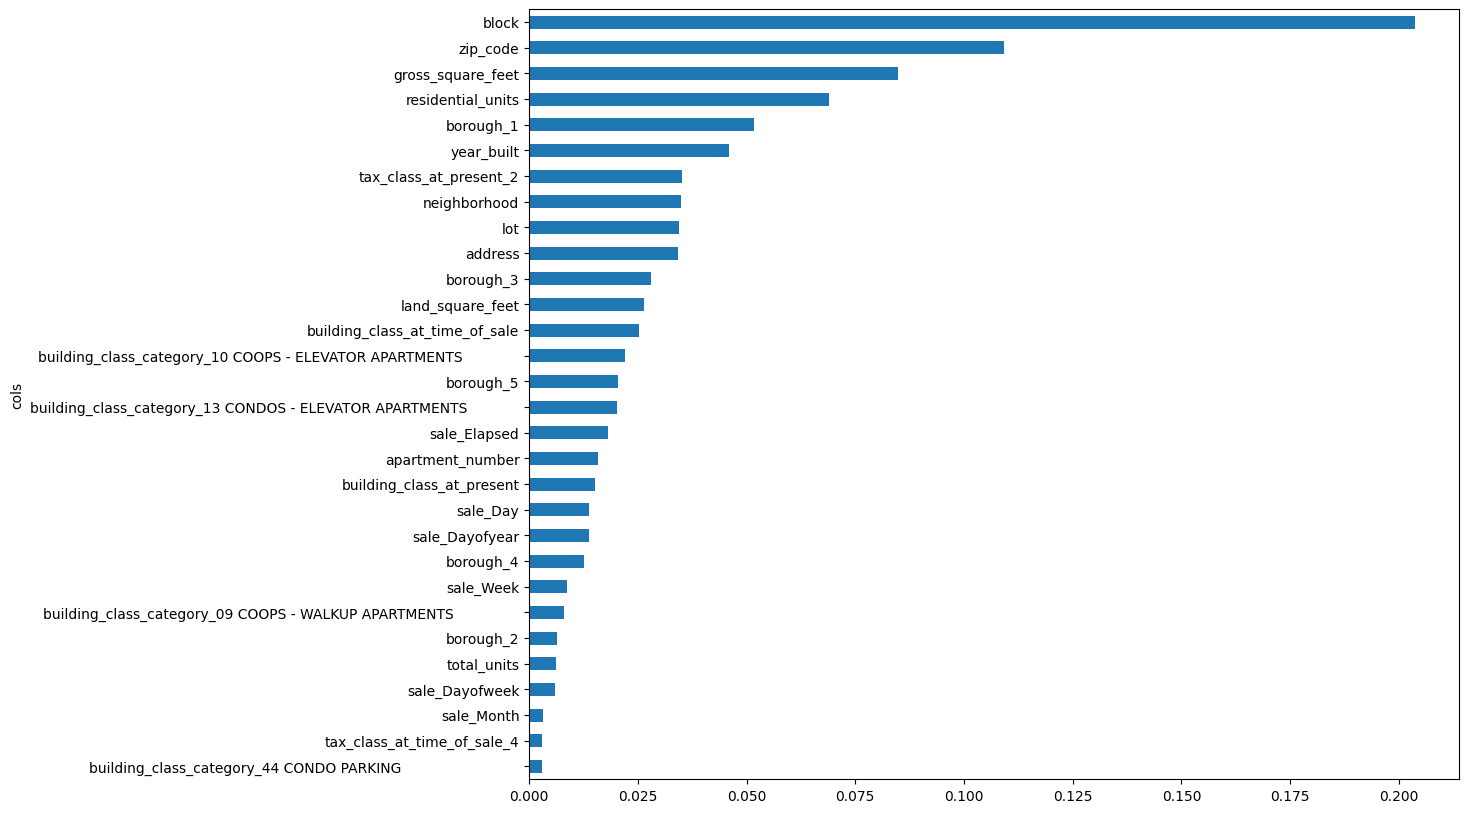

In [115]:
fi = feat_importance[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
fi = fi.invert_yaxis()
fi

Observation : 

Seeing the barplot above, we can clearly observe that the 3 most import features are block, zip_code and gross_square_feet. We can use the following explanation for each one of them. 

- Block : A block is generally a group of contiguous lots. bounded by streets, such as a city block. The lot and block method is used to an extent in all states but is always used in conjunction with another form of land description, such as metes-and-bounds, or government survey, hence the importance of this feature regarding predicting properties prices. 


- Zip code : ZIP Codes are not just numbers that identify a location. They have become social identifiers – giving information on the demographics of the people of a certain region. Companies use Zip Codes as important data structures that give them a visual representation of their audience. With this information, companies are making major marketing decisions including the closing or opening of stores, launching new products or services and pivoting sales data into regions. ZIP Codes are POWERFUL and as such, it is necessary for any business to have VALID and ACCURATE ZIP codes.


- Gross square feet : It's the total space a facility takes up regardless of whether or not the space is used. GSF is an important metric for planning and budgeting in construction as well as benchmarking for operations and maintenance.



# Conclusion : 

Wiht this conclusion, the project has come to an end. We then have managed to predict fututre New York Rolling sales using a Random Forest and processing a regression task. The model chosen wasn't the best but it is decent and can help grow real estate business.

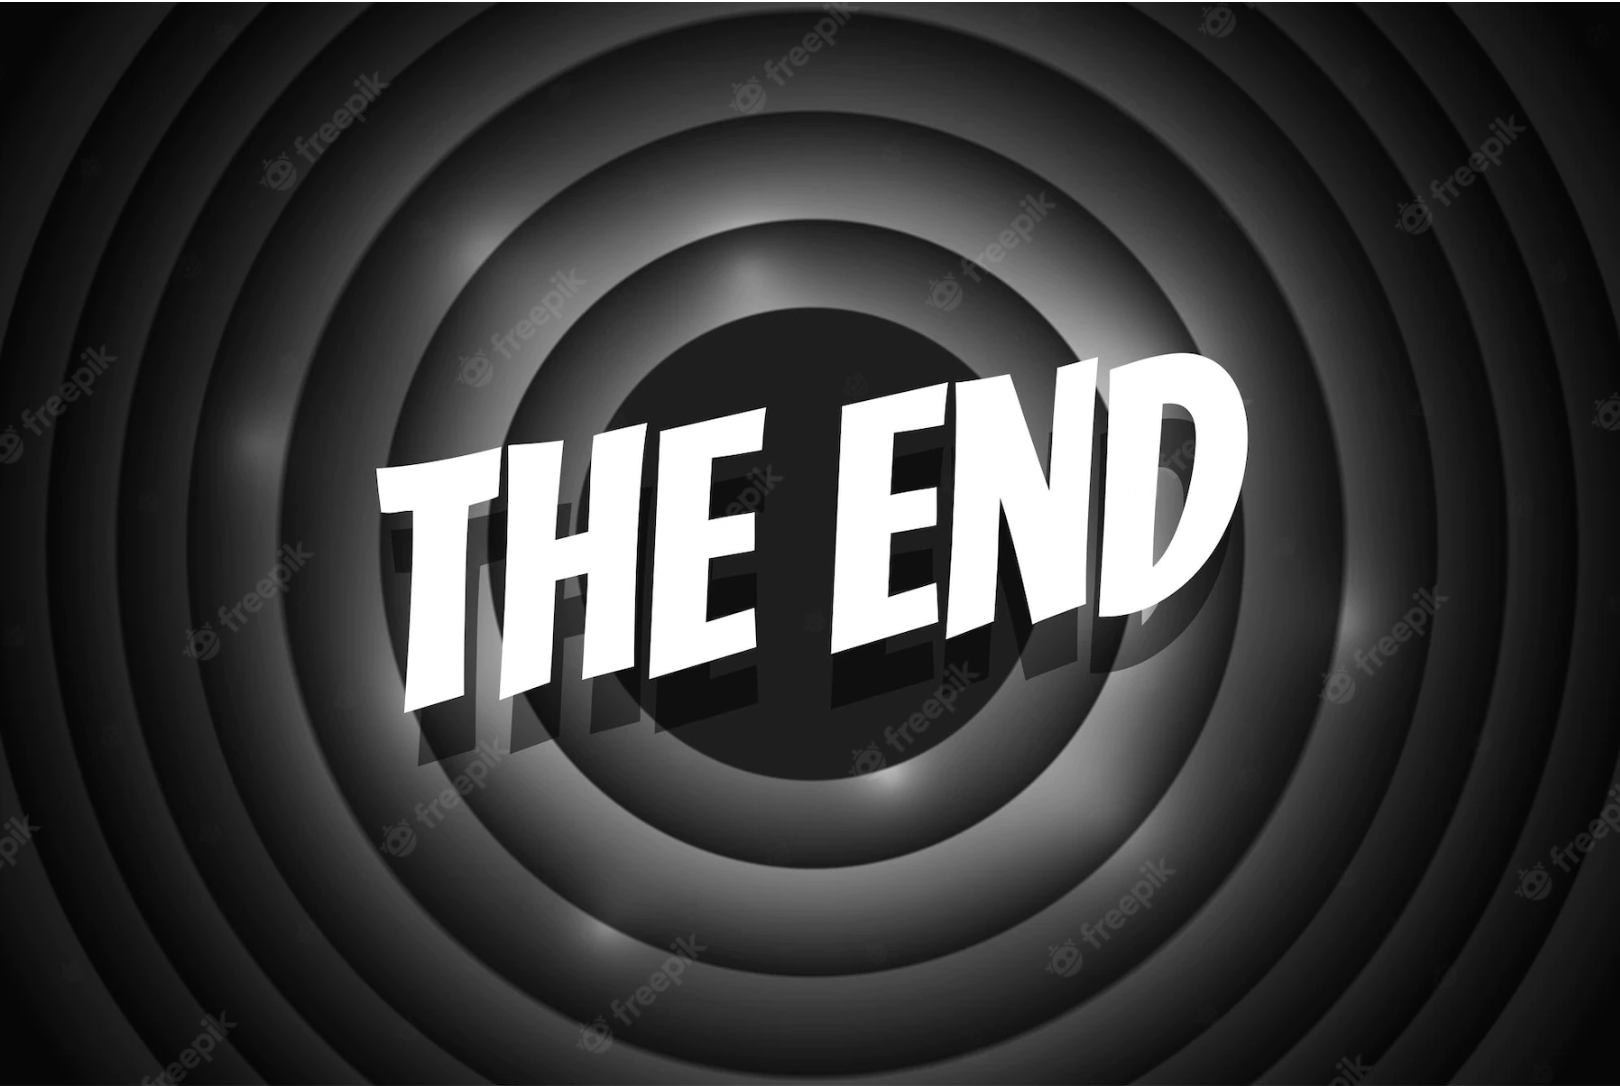